## A simple but powerful numerical solver for the Schrodinger equation

For a particle moving in 1D with fixed energy $E$, the full Schrodinger equation (which is a PDE) turns into a simplified ODE:

$-\frac{\hbar^2}{2 m} \frac{d^2 W}{dx^2} + V(x) \, W = E \, W$

To avoid computing with crazy small numbers like $10^{-34}$ and $10^{-30}$, let us measure masses in units of the given particle's mass (so that $m=1$). We will also measure energies in units of rad/s, instead of the macroscopically large unit joule (so that $\hbar = 1$). 

In these sensible units our equation becomes 
$\boxed{ -\frac{1}{2} \frac{d^2 W}{dx^2} + V(x) \, W = E \, W }$.

This is what we will solve numerically.

In [2]:
import numpy as np
from numpy import arctan,pi
from scipy import linalg as lg
import matplotlib.pyplot as plt
%matplotlib inline

def V(x):
    return (arctan((x-2)/0.1)/(pi/2) - arctan((x+2)/0.1)/(pi/2))   # a squarish well
    # return 0.5*x**2                                              # a harmonic oscillator with k=1

N = 1000       # number of discrete points on the spatial grid
x = np.linspace(-30,30,N)
dx = x[1]-x[0]

Let us plot this potential and see how it looks:

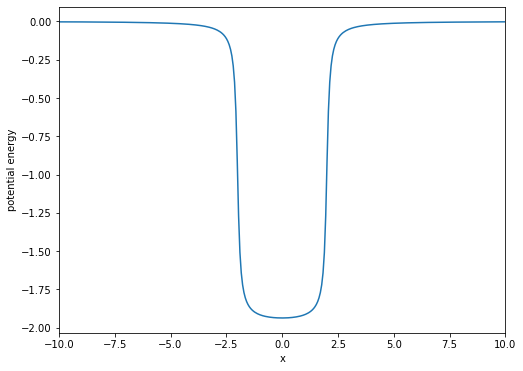

In [3]:
plt.figure(figsize=(8,6))
plt.plot(x,V(x))
plt.xlim(-10,10)
plt.xlabel("x")
plt.ylabel("potential energy")
plt.show()

The algorithm to solve the differential equation is extremely simple. There are two basic ideas here:
1. Every linear differential equation is secretly just a matrix problem, if you compute on a discrete grid. Python is superb at solving matrix problems.
2. The second derivative $\frac{d^2 f}{dx^2}$ of a function $f$, when approximated on a grid, is
$\frac{d^2 f}{dx^2} \approx \frac{f(x+dx) + f(x-dx) - 2 f(x)}{(dx)^2}$.

In [4]:
# ----- the solver -----
V_matrix = np.matrix(np.diag(V(x)))                                                  # matrix version of V(x)
K_matrix = -0.5*np.matrix( np.eye(N,k=-1) - 2*np.eye(N) + np.eye(N,k=+1) )/dx**2     # matrix version of -1/2 d^2/dx^2
eigen_energies,eigvecs = lg.eigh(K_matrix + V_matrix)

eigenmodes = eigvecs.T                                                               # .T is needed because of the way the linalg library returns eigenvectors
# ...... that's it! ....... 

Let us see what some of the natural frequencies (= energies) are for this system. Let's look at the first 10 of them, starting with the lowest that Python indexes by the number "0".

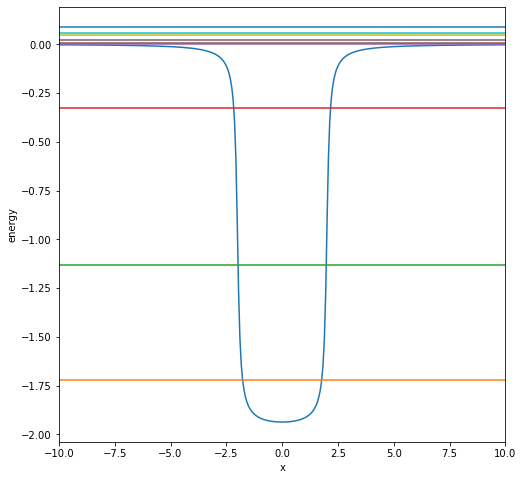

In [5]:
plt.figure(figsize=(8,8))
plt.plot(x,V(x))
plt.xlim(-10,10)
plt.xlabel("x")
plt.ylabel("energy")
for i in range(10):     
    plt.plot(x,eigen_energies[i]*np.ones(len(x)),color=f"C{i+1}")
plt.show()

And let's see what the corresponding wavefunctions look like (colour-coded in the same way as the natural energies above):

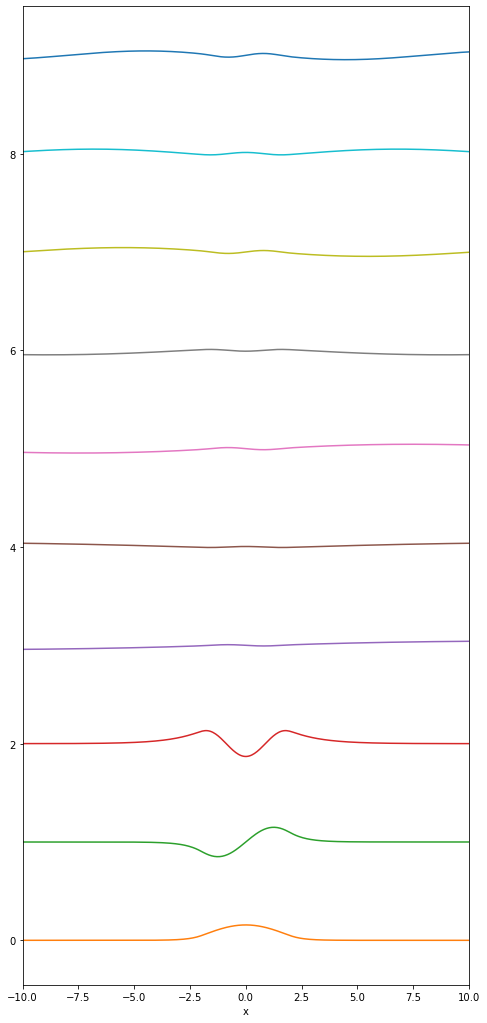

In [6]:
plt.figure(figsize=(8,18))
plt.xlim(-10,10)
for i in range(10):
    plt.plot(x,eigenmodes[i] + i,color=f"C{i+1}")   
    # the last '+ i' just displaces the solutions so they are easier to see in the plot
    plt.xlabel("x")
plt.show()

Finally, let us plot the wavefunctions and the potential energy on the same plot, to get some intuition for where the wavefunctions turn off ... but be **very careful**, this plot mixes two completely different quantities!

The wavefunctions are plotted at a y-level that corresponds to their natural energy.

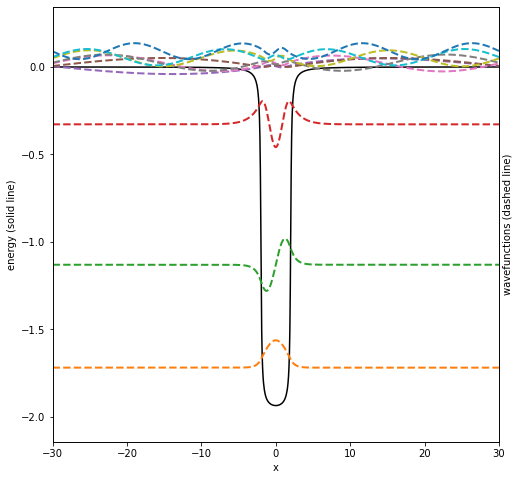

In [7]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x,V(x),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')

for i in range(10):
    ax.plot(x,eigenmodes[i] + eigen_energies[i],'--',lw=2,color=f"C{i+1}")  

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.margins(0,0.1)
plt.show()

Notice how the bound solutions "damp out" past the turning points, whereas the unbound solutions continue to wiggle outside the well.

## Example #2

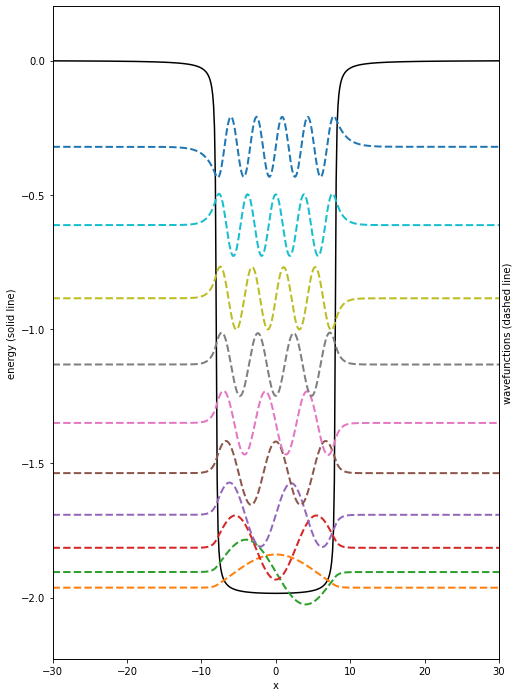

In [8]:
def V(x):
    return (arctan((x-8)/0.1)/(pi/2) - arctan((x+8)/0.1)/(pi/2))   # a squarish well

N = 500       # number of discrete points on the spatial grid
x = np.linspace(-30,30,N)
dx = x[1]-x[0]


# ----- the solver -----
V_matrix = np.matrix(np.diag(V(x)))                                                  # matrix version of V(x)
K_matrix = -0.5*np.matrix( np.eye(N,k=-1) - 2*np.eye(N) + np.eye(N,k=+1) )/dx**2     # matrix version of -1/2 d^2/dx^2
eigen_energies,eigvecs = lg.eigh(K_matrix + V_matrix)
eigenmodes = eigvecs.T
# ...... .... ....... 


fig,ax = plt.subplots(figsize=(8,12))
ax.plot(x,V(x),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')

for i in range(10):
    ax.plot(x,eigenmodes[i] + eigen_energies[i],'--',lw=2,color=f"C{i+1}")  

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.margins(0,0.1)
plt.show()

## Example #3

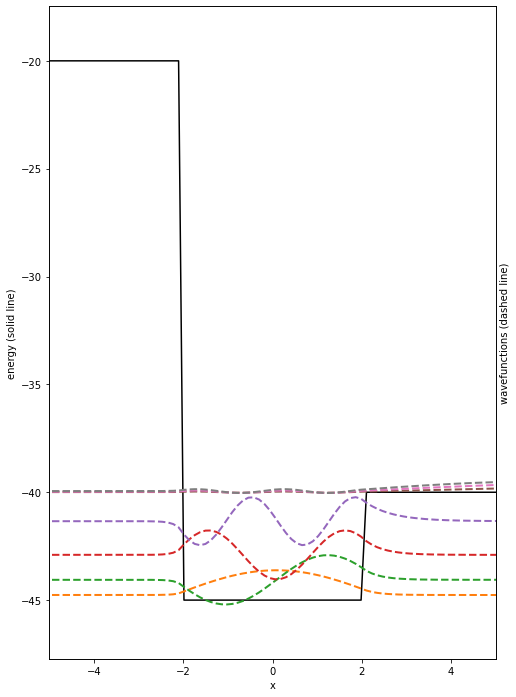

In [9]:
def V(x):
    if np.abs(x) < 2: return -45
    elif x>2: return -40
    else: return -20
    
V = np.vectorize(V)       # allows functions containing logical if/or etc to be applied to a numpy array

N = 500       # number of discrete points on the spatial grid
x = np.linspace(-30,30,N)
dx = x[1]-x[0]


# ----- the solver -----
V_matrix = np.matrix(np.diag(V(x)))                                                  # matrix version of V(x)
K_matrix = -0.5*np.matrix( np.eye(N,k=-1) - 2*np.eye(N) + np.eye(N,k=+1) )/dx**2     # matrix version of -1/2 d^2/dx^2
eigen_energies,eigvecs = lg.eigh(K_matrix + V_matrix)
eigenmodes = eigvecs.T
# ...... .... ....... 


fig,ax = plt.subplots(figsize=(8,12))
ax.plot(x,V(x),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')
ax.set_xlim(-5,5)

for i in range(7):
    ax.plot(x,5*eigenmodes[i] + eigen_energies[i],'--',lw=2,color=f"C{i+1}")  

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.margins(0,0.1)
plt.show()

## Example #4

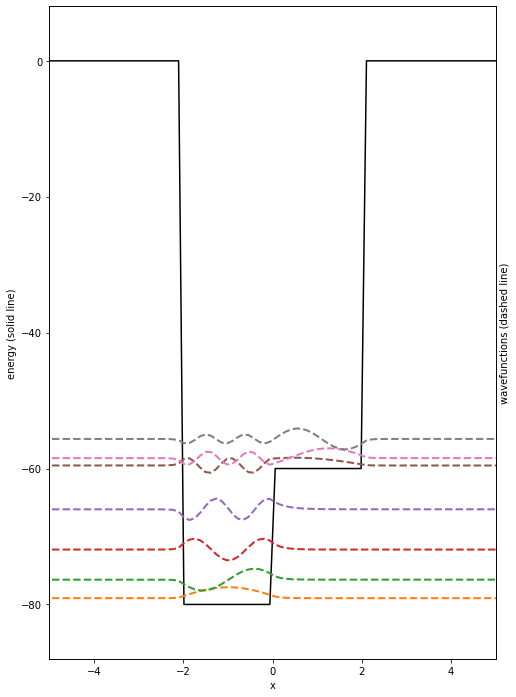

In [10]:
def V(x):
    if (x<0 and x>-2): return -80
    elif (x<2 and x>0): return -60
    else: return 0
    
V = np.vectorize(V)       # allows functions containing logical if/or etc to be applied to a numpy array

N = 500       # number of discrete points on the spatial grid
x = np.linspace(-30,30,N)
dx = x[1]-x[0]


# ----- the solver -----
V_matrix = np.matrix(np.diag(V(x)))                                                  # matrix version of V(x)
K_matrix = -0.5*np.matrix( np.eye(N,k=-1) - 2*np.eye(N) + np.eye(N,k=+1) )/dx**2     # matrix version of -1/2 d^2/dx^2
eigen_energies,eigvecs = lg.eigh(K_matrix + V_matrix)
eigenmodes = eigvecs.T
# ...... .... ....... 


fig,ax = plt.subplots(figsize=(8,12))
ax.plot(x,V(x),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')
ax.set_xlim(-5,5)

for i in range(7):
    ax.plot(x,5*eigenmodes[i] + eigen_energies[i],'--',lw=2,color=f"C{i+1}")  

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.margins(0,0.1)
plt.show()

## Example #5

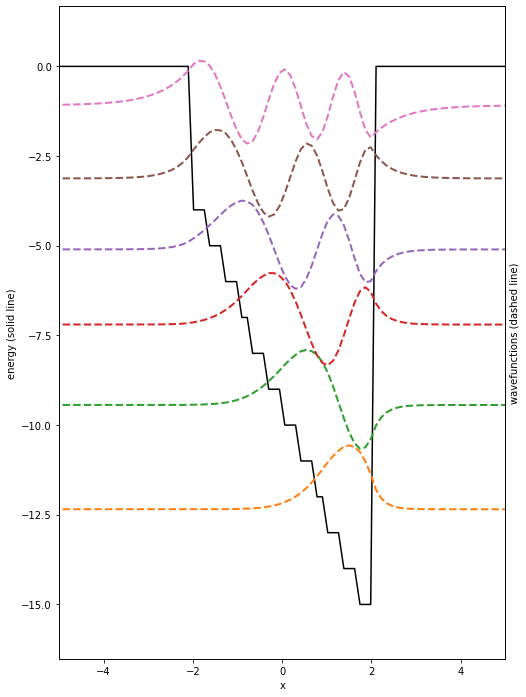

In [11]:
def V(x):
    if np.abs(x)<2.: return -3.*x-10.
    else: return 0
    
V = np.vectorize(V)       # allows functions containing logical if/or etc to be applied to a numpy array

N = 500       # number of discrete points on the spatial grid
x = np.linspace(-30,30,N)
dx = x[1]-x[0]


# ----- the solver -----
V_matrix = np.matrix(np.diag(V(x)))                                                  # matrix version of V(x)
K_matrix = -0.5*np.matrix( np.eye(N,k=-1) - 2*np.eye(N) + np.eye(N,k=+1) )/dx**2     # matrix version of -1/2 d^2/dx^2
eigen_energies,eigvecs = lg.eigh(K_matrix + V_matrix)
eigenmodes = eigvecs.T
# ...... .... ....... 


fig,ax = plt.subplots(figsize=(8,12))
ax.plot(x,V(x),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')
ax.set_xlim(-5,5)

for i in range(6):
    ax.plot(x,5*eigenmodes[i] + eigen_energies[i],'--',lw=2,color=f"C{i+1}")  

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.margins(0,0.1)
plt.show()

## Example #6

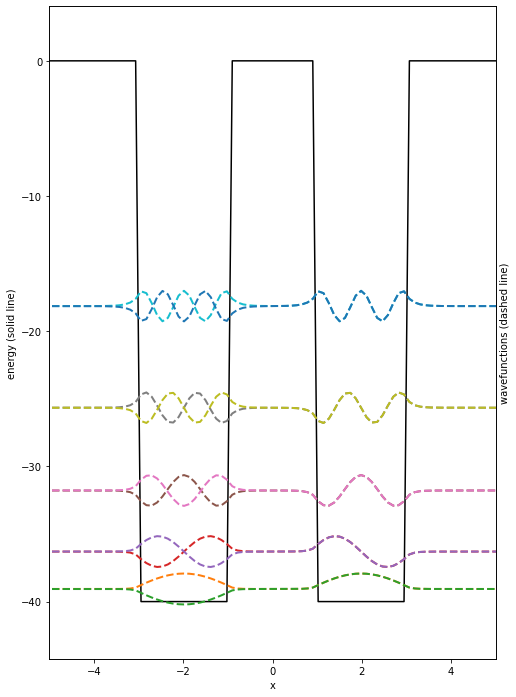

In [12]:
def V(x):
    if (x<-1 and x>-3): return -40
    elif (x<3 and x>1): return -40
    else: return 0
    
V = np.vectorize(V)       # allows functions containing logical if/or etc to be applied to a numpy array

N = 500       # number of discrete points on the spatial grid
x = np.linspace(-30,30,N)
dx = x[1]-x[0]


# ----- the solver -----
V_matrix = np.matrix(np.diag(V(x)))                                                  # matrix version of V(x)
K_matrix = -0.5*np.matrix( np.eye(N,k=-1) - 2*np.eye(N) + np.eye(N,k=+1) )/dx**2     # matrix version of -1/2 d^2/dx^2
eigen_energies,eigvecs = lg.eigh(K_matrix + V_matrix)
eigenmodes = eigvecs.T
# ...... .... ....... 


fig,ax = plt.subplots(figsize=(8,12))
ax.plot(x,V(x),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')
ax.set_xlim(-5,5)

for i in range(10):
    ax.plot(x,5*eigenmodes[i] + eigen_energies[i],'--',lw=2,color=f"C{i+1}")  

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.margins(0,0.1)
plt.show()

## Example #7

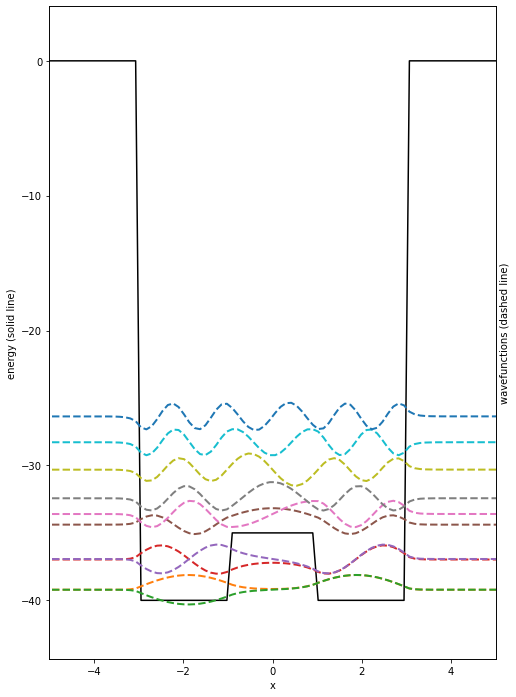

In [13]:
def V(x):
    if (x<-1 and x>-3): return -40
    elif (x<3 and x>1): return -40
    elif (x<1 and x>-1): return -35
    else: return 0
    
V = np.vectorize(V)       # allows functions containing logical if/or etc to be applied to a numpy array

N = 500       # number of discrete points on the spatial grid
x = np.linspace(-30,30,N)
dx = x[1]-x[0]


# ----- the solver -----
V_matrix = np.matrix(np.diag(V(x)))                                                  # matrix version of V(x)
K_matrix = -0.5*np.matrix( np.eye(N,k=-1) - 2*np.eye(N) + np.eye(N,k=+1) )/dx**2     # matrix version of -1/2 d^2/dx^2
eigen_energies,eigvecs = lg.eigh(K_matrix + V_matrix)
eigenmodes = eigvecs.T
# ...... .... ....... 


fig,ax = plt.subplots(figsize=(8,12))
ax.plot(x,V(x),color='k')
ax.set_xlabel("x")
ax.set_ylabel("energy (solid line)",color='k')
ax.set_xlim(-5,5)

for i in range(10):
    ax.plot(x,5*eigenmodes[i] + eigen_energies[i],'--',lw=2,color=f"C{i+1}")  

ax2 = ax.twinx()
ax2.set_ylabel("wavefunctions (dashed line)")
ax2.set_yticks([])
ax.margins(0,0.1)
plt.show()